In [1]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import time


from scipy import stats
from scipy.stats import norm

Load properties on sales data for 2018 (excluding December) ,Ilford, London into a dataframe.

In [2]:
data = pd.read_csv('C:/data/Sales.csv')
#data = data.drop(columns=['price_change','num_floors'], axis=1)

1. After we read the data, we can look at the data that has been loaded

In [3]:
data.head()

,num_bedrooms,first_published_date,last_published_date,price_modifier,price,listing_id,property_type,country_code,outcode,num_recepts,listing_status,category,county,displayable_address,post_town,country,num_bathrooms,longitude,street_name,description
0,6,2018-09-26 13:07:55,2018-09-27 03:10:35,offers_in_region_of,1599995.0,49161239,Detached bungalow,gb,IG3,3,sale,Residential,Essex,"Egerton Gardens, Ilford IG3",Ilford,England,6,0.099798,Egerton Gardens,"Living room one 26' 03"" x 16' 10"" (8m x 5.13m)..."
1,7,2018-09-10 09:12:06,2018-11-28 20:19:26,NaN,1300000.0,48982090,Semi-detached house,gb,IG3,3,sale,Residential,Essex,"Water Lane, Seven Kings, Essex IG3",Ilford,England,4,0.095862,Water Lane,Sandra Davidson Estate Agents are privileged t...
2,7,2018-08-22 10:09:38,2018-11-23 19:14:53,NaN,1300000.0,48800189,Semi-detached house,gb,IG3,2,sale,Residential,Essex,"Water Lane, Ilford IG3",Ilford,England,4,0.095862,Water Lane,"Finished to a high standard, this gorgeous sev..."
3,5,2018-11-16 13:15:33,2018-11-20 10:57:15,NaN,1250000.0,49701197,End terrace house,gb,IG5,3,sale,Residential,Essex,"Lord Avenue, Clayhall, Ilford IG5",Ilford,England,3,0.056757,Lord Avenue,"We are pleased to present this beautiful, mode..."
4,8,2018-06-02 04:06:19,2018-09-22 04:15:08,NaN,1000000.0,47842748,End terrace house,gb,IG3,0,sale,Residential,Essex,"Green Lane, Ilford IG3",Ilford,England,0,0.115216,Ilford,Fully licensed hmo - Located in a popular area...


1. Three features have missing values. 
2. The percentage of missing values in these columns.

In [4]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
price_modifier,252,0.425676
property_type,34,0.057432
street_name,10,0.016892
description,0,0.000000
first_published_date,0,0.000000
last_published_date,0,0.000000
price,0,0.000000
listing_id,0,0.000000
country_code,0,0.000000
outcode,0,0.000000


1. Plot a line graph
2. Count number of houses that were put up for sale on a given month 
3. month values on X-axis: 1 = Jan, 2 = Feb 3 = March etc..
4. The data excludes December 2018

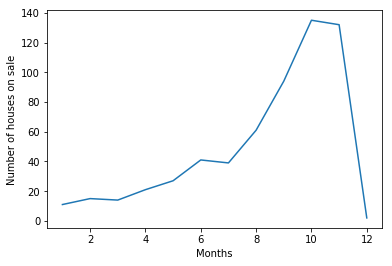

In [5]:
data['month_date'] = pd.to_datetime(data['first_published_date'])
plot_data = data.groupby(data['month_date'].dt.month).agg({'count'})
#data['month'].dt.month
monthMeans = plot_data['listing_id']
plt.plot(monthMeans)
plt.xlabel('Months')
plt.ylabel('Number of houses on sale')
plt.show()

1. Is the data for price variable normally distributed

C:\Users\KhalidH\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


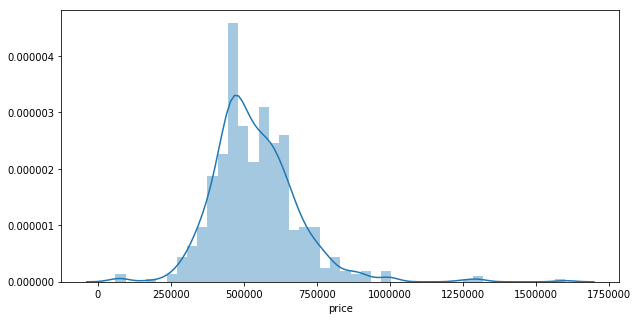

In [6]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 5.0)
sns.distplot(data['price'])

1. A normal distribution is a bell-shaped distribution of data where the mean, median and mode all coincide. A frequency curve showing a normal distribution would look like this:
2. If there are extreme values towards the positive end of a distribution, the distribution is said to be positively skewed. In a positively skewed distribution, the mean is greater than the mode
3. A negatively skewed distribution, on the other hand, has a mean which is less than the mode because of the presence of extreme values at the negative end of the distribution.
4. In this case mean is greater then mode.
5. Our graph shows positive skew, that is when the long tail is on the positive side of the peak.

In [7]:
data['price'].mean()

538417.8445945946

In [8]:
data['price'].mode()

0    500000.0
dtype: float64

In [9]:
print("Skewness: %f" % data['price'].skew())

Skewness: 1.418926


1. Kurtosis indicates how the peak and tails of a distribution differ from the normal distribution. Use kurtosis to help you initially understand general characteristics about the distribution of your data.
2. Data that follow a normal distribution perfectly have a kurtosis value of 0. Normally distributed data establishes the baseline for kurtosis. 
3. A distribution with a negative kurtosis value indicates that the distribution has lighter tails and a flatter peak than the normal distribution.
4. A distribution with a positive kurtosis value indicates that the distribution has heavier tails and a sharper peak than the normal distribution.
5. Our graph shows postive kurtosis

In [10]:
print("Kurtosis: %f" % data['price'].kurt())

Kurtosis: 6.956948


Skewness is -1.4429294728944235


C:\Users\KhalidH\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


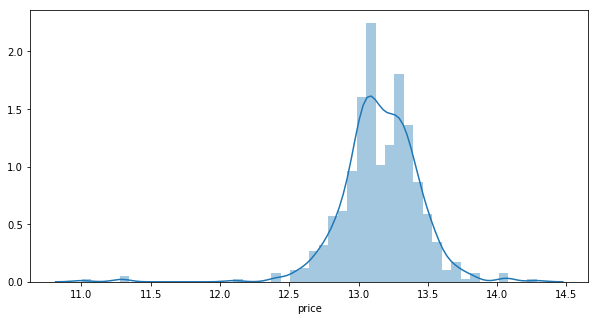

In [11]:
#now transforming the target variable
target = np.log(data['price'])
print ('Skewness is', target.skew())
sns.distplot(target)

1. View the distribution of the target column price using a boxplot. 
2. Boxplot show the outliers

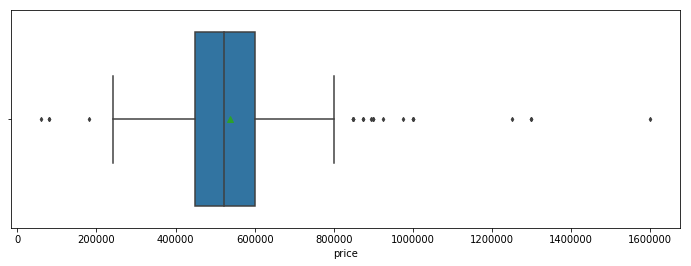

In [131]:
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(x = 'price', data =data, orient = 'h', width = 0.8,fliersize = 3, showmeans=True, ax = ax)
plt.show()

1. Look at various interesting statictics to get the idea of properties on sale

In [70]:
data_stats = data.groupby(['outcode','property_type'], as_index=True)['price'].describe()
data_stats = data_stats.drop(columns=['mean','std'], axis=1)
data_stats
#ata.groupby(['outcode','property_type'])['price'].describe().unstack()

count       min        25%       50%  \
outcode property_type                                                  
IG1     Bungalow                  2.0  180000.0  281250.00  382500.0   
        Detached house            2.0  450000.0  456250.00  462500.0   
        End terrace house         9.0  290000.0  415000.00  500000.0   
        Semi-detached house      24.0  365000.0  476250.00  635000.0   
        Terraced house           81.0  241500.0  395000.00  470000.0   
        Town house                1.0  430000.0  430000.00  430000.0   
IG11    Terraced house            3.0  330000.0  339500.00  349000.0   
IG2     Bungalow                  1.0  375000.0  375000.00  375000.0   
        Detached house            2.0  600000.0  650000.00  700000.0   
        End terrace house        14.0  375000.0  500000.00  620000.0   
        Semi-detached bungalow    1.0  599995.0  599995.00  599995.0   
        Semi-detached house       9.0  429500.0  500000.00  650000.0   
        Terraced house           44.0  330500.0  450000.00  500000.0   
IG3     Bungalow                  9.0  500000.0  699995.00  750000.0   
        Detached bungalow         3.0  875000.0  887499.50  899999.0   
        Detached house           10.0  400000.0  592500.00  625000.0   
        End terrace house        11.0  375000.0  505000.00  550000.0   
        Semi-detached bungalow    8.0  575000.0  593712.50  655000.0   
        Semi-detached house      19.0  400000.0  487500.00  590000.0   
        Terraced house           56.0  281000.0  425000.00  457500.0   
IG4     Bungalow                  3.0  525000.0  537500.00  550000.0   
        End terrace house         7.0  580000.0  607497.50  650000.0   
        Semi-detached bungalow    2.0  625000.0  637500.00  650000.0   
        Semi-detached house      10.0  525000.0  599996.25  600000.0   
        Terraced house           25.0   60000.0  550000.00  635000.0   
IG5     Bungalow                  6.0  460000.0  531250.00  550000.0   
        Detached bungalow         5.0  330500.0  500000.00  500000.0   
        Detached house            1.0  500000.0  500000.00  500000.0   
        End terrace house        11.0  390000.0  412250.00  495000.0   
        Semi-detached bungalow    4.0  430500.0  445125.00  454997.5   
        Semi-detached house      41.0  363500.0  480000.00  550000.0   
        Terraced house           14.0  247500.0  403746.25  505000.0   
IG6     Bungalow                  6.0  400000.0  412500.00  455000.0   
        Detached house           17.0  455000.0  520000.00  570000.0   
        End terrace house        18.0  350000.0  450000.00  469995.0   
        Semi-detached bungalow    7.0  370000.0  465000.00  465000.0   
        Semi-detached house      38.0  297500.0  450000.00  500000.0   
        Terraced bungalow         1.0  565000.0  565000.00  565000.0   
        Terraced house           32.0  281000.0  418750.00  450000.0   
        Town house                1.0  500000.0  500000.00  500000.0   

                                       75%        max  
outcode property_type                                  
IG1     Bungalow                 483750.00   585000.0  
        Detached house           468750.00   475000.0  
        End terrace house        550000.00   735000.0  
        Semi-detached house      703750.00   925000.0  
        Terraced house           535000.00   725000.0  
        Town house               430000.00   430000.0  
IG11    Terraced house           359500.00   370000.0  
IG2     Bungalow                 375000.00   375000.0  
        Detached house           750000.00   800000.0  
        End terrace house        650000.00   799950.0  
        Semi-detached bungalow   599995.00   599995.0  
        Semi-detached house      750000.00   900000.0  
        Terraced house           555000.00   650000.0  
IG3     Bungalow                 800000.00   899999.0  
        Detached bungalow       1249997.00  1599995.0  
        Detached house           668750.00   975000.0  

1.Interquartile Range shows the difference between high and low median prices.
2 It's important to take into consideration the size of the rooms, number of bathrooms and condition of the house.


In [155]:
three_bed = data[((data.property_type == 'Terraced house') | (data.property_type == 'Semi-detached house' )) & ( data.num_bedrooms == 4) & ( data.outcode != 'IG11')]
interquartile_range = three_bed.groupby(['outcode','property_type'])['price'].quantile(.75)- three_bed.groupby(['outcode','property_type'])['price'].quantile(.25)
interquartile_range

outcode  property_type      
IG1      Semi-detached house     51250.00
         Terraced house         150000.00
IG2      Semi-detached house    155125.00
         Terraced house          97500.00
IG3      Semi-detached house     37525.00
         Terraced house         103750.00
IG4      Semi-detached house    100000.00
         Terraced house          15000.00
IG5      Semi-detached house     76253.75
         Terraced house          67500.00
IG6      Semi-detached house    143750.00
         Terraced house          88000.00
Name: price, dtype: float64

In [15]:
def houses_stats(p_type, rooms):

    df_filtered = data[(data.property_type == p_type) &( data.num_bedrooms == rooms)]
    df_filtered = df_filtered.groupby(['num_bedrooms','outcode','property_type'], as_index=True)['price'].describe()
    df_filtered = df_filtered.drop(columns=['mean','std'], axis=1)
    df_filtered.columns = ['count', 'min_price', 'low','middle','high','max_price']
    
    return df_filtered.sort_values(['high','middle'], inplace=False, ascending=False)


In [42]:
houses_stats('Semi-detached house', 3)


count  min_price       low  \
num_bedrooms outcode property_type                                     
3            IG4     Semi-detached house    5.0   575000.0  599995.0   
             IG5     Semi-detached house   21.0   363500.0  475000.0   
             IG6     Semi-detached house   20.0   297500.0  450000.0   
             IG3     Semi-detached house    8.0   400000.0  442250.0   
             IG2     Semi-detached house    2.0   465000.0  473750.0   
             IG1     Semi-detached house    7.0   365000.0  387500.0   

                                            middle       high  max_price  
num_bedrooms outcode property_type                                        
3            IG4     Semi-detached house  600000.0  600000.00   600000.0  
             IG5     Semi-detached house  525000.0  565000.00   700000.0  
             IG6     Semi-detached house  460000.0  517496.25   670000.0  
             IG3     Semi-detached house  487500.0  512500.00   635000.0  
             IG2     Semi-detached house  482500.0  491250.00   500000.0  
             IG1     Semi-detached house  415000.0  477500.00   650000.0

In [17]:
houses_stats('Terraced house', 3)

count  min_price        low    middle  \
num_bedrooms outcode property_type                                           
3            IG4     Terraced house    6.0   379500.0  475000.00  512500.0   
             IG2     Terraced house   29.0   330500.0  450000.00  480000.0   
             IG6     Terraced house   22.0   281000.0  399999.25  440000.0   
             IG1     Terraced house   41.0   241500.0  379995.00  425000.0   
             IG5     Terraced house    5.0   247500.0  375000.00  379995.0   
             IG3     Terraced house   28.0   281000.0  415000.00  432500.0   
             IG11    Terraced house    1.0   370000.0  370000.00  370000.0   

                                         high  max_price  
num_bedrooms outcode property_type                        
3            IG4     Terraced house  568750.0   649950.0  
             IG2     Terraced house  525000.0   600000.0  
             IG6     Terraced house  475000.0   540000.0  
             IG1     Terraced house  475000.0   675000.0  
             IG5     Terraced house  475000.0   575000.0  
             IG3     Terraced house  450000.0   575000.0  
             IG11    Terraced house  370000.0   370000.0

In [21]:
average_house_price = data.groupby('outcode') \
       .agg({'outcode':'size', 'price':'mean'}) \
       .rename(columns={'outcode':'count','price':'avg_price'}) \
       .reset_index()
#average_house_price = data[['num_bedrooms', 'price', 'outcode']].groupby(['price', 'outcode']).agg(['mean', 'count'])
print(average_house_price)

  outcode  count      avg_price
0     IG1    136  494278.786765
1    IG11      3  349666.666667
2     IG2     73  547812.808219
3     IG3    121  589668.231405
4     IG4     50  605378.800000
5     IG5     85  538263.764706
6     IG6    124  508958.854839


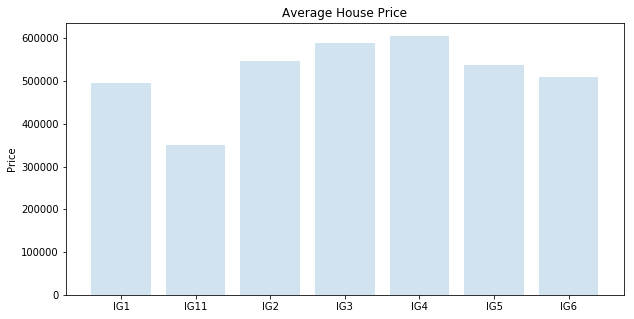

In [22]:
postcode_objects = average_house_price['outcode']
y_pos = np.arange(len(postcode_objects))
avg_price = average_house_price['avg_price']
 
plt.bar(y_pos, avg_price, align='center', alpha=0.2)
plt.xticks(y_pos, postcode_objects)
plt.ylabel('Price')
plt.title('Average House Price')
 
plt.show()

In [156]:
def postcode_scatter( value ):
    postcode = data[(data.outcode == value)]
   
    num_bedrooms = postcode['num_bedrooms']
    price = postcode['price']
    #fig, ax = plt.subplots(figsize=(6, 7))
    plt.scatter(num_bedrooms, price, edgecolors='ybr')
    plt.xlabel('number of bed rooms')
    plt.ylabel('price ')
    plt.title('House price by postcode ' + str(value))
    plt.show()
    

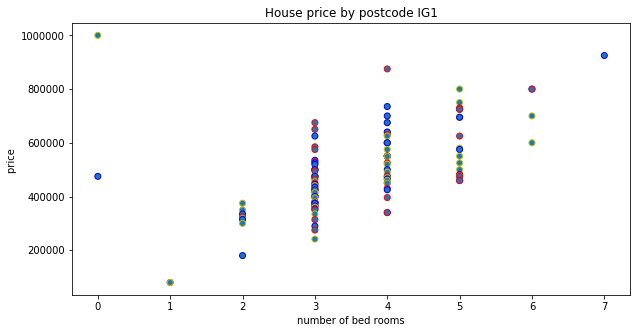

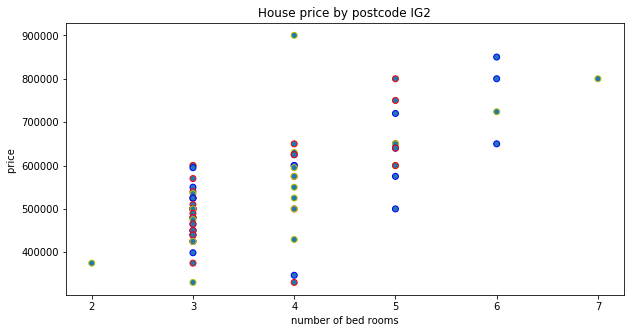

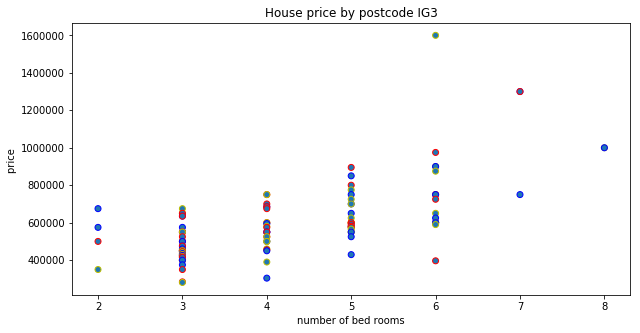

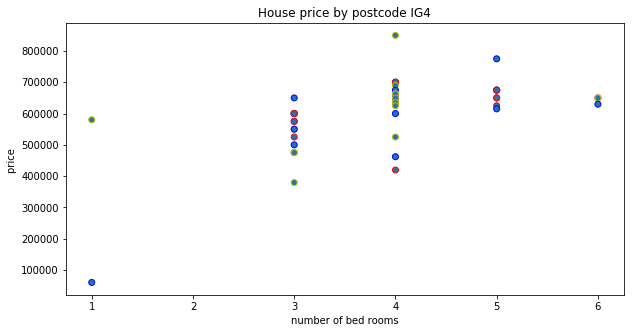

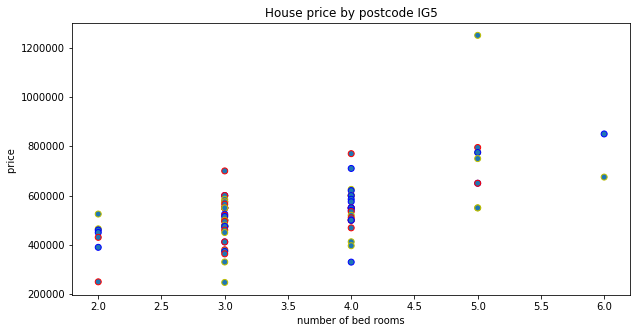

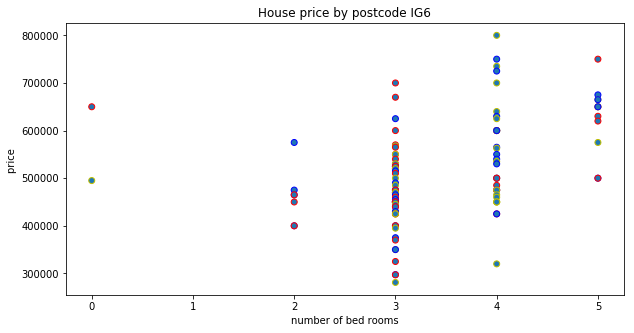

In [157]:
#for i in range(len(postcode_objects)):
    #if postcode_objects[i] != 'IG11':
       # postcode_scatter(postcode_objects[i])  

output = [postcode_scatter(postcode_objects[i]) for i in range(len(postcode_objects)) if postcode_objects[i] != 'IG11']
        